 
 
     3Homework solution:    ML02_EDA
                   By:    K Dehnad

In [ ]:
# pip install ydata-profiling --user

In [ ]:
# !pip install numpy==2.0.2


In [1]:
!python --version


Python 3.12.7


In [2]:
!pip list


Package                Version
---------------------- ----------------
annotated-types        0.7.0
apturl                 0.5.2
asttokens              3.0.0
attrs                  25.1.0
bcrypt                 3.2.0
blinker                1.4
Brlapi                 0.8.3
certifi                2020.6.20
chardet                4.0.0
click                  8.0.3
colorama               0.4.4
comm                   0.2.2
command-not-found      0.3
contourpy              1.3.1
cryptography           3.4.8
cupshelpers            1.0
cycler                 0.12.1
dacite                 1.9.2
dbus-python            1.2.18
debugpy                1.8.12
decorator              5.1.1
defer                  1.0.6
distro                 1.7.0
distro-info            1.1+ubuntu0.1
duplicity              0.8.21
exceptiongroup         1.2.2
executing              2.2.0
fasteners              0.14.1
fonttools              4.55.8
future                 0.18.2
htmlmin                0.1.12
httplib2       

In [ ]:
# pip install pydantic-settings

In [ ]:
# pip install ydata-profiling

In [1]:
# pip install ydata-profiling
from ydata_profiling import ProfileReport

/home/elcaskerito/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport


Iris_modified data dictionary 
SepalLength     Int64
SepalWidth      Int64
PetalLength     Int64
PetalWidth      Int64
Species         str

In [7]:
# Load the data into a pandas dataframe

coltype={'SepalLength':'Int64' , 'SepalWidth':'Int64','PetalLength':'Int64', 'PetalWidth':'Int64', 'Species':'str' }
folder='/home/elcaskerito/Documents/Stevens Jupiter/file/iris_modified.csv'

df = pd.read_csv(folder,na_values='?',dtype=coltype)


df.head()
# df.tail(10)


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,50,33,14,2,Setosa
1,46,34,<NA>,3,Setosa
2,46,36,10,2,Setosa
3,51,33,17,5,Setosa
4,55,35,13,2,Setosa


In [8]:
print(df.dtypes)

SepalLength     Int64
SepalWidth      Int64
PetalLength     Int64
PetalWidth      Int64
Species        object
dtype: object


In [9]:


# Compute the minimum, maximum, and mean of each numeric column

# Summarize each column
summary = df.describe()

# Print the summary
print(summary)

print('\n min, max, mean only')
# Min_Max_Mean=df.describe(include=[float, int]).loc[["min", "max", "mean"]]
Min_Max_Mean=df.describe().loc[["min", "max", "mean"]]
print(Min_Max_Mean)



       SepalLength  SepalWidth  PetalLength  PetalWidth
count        150.0       150.0        147.0       150.0
mean     58.633333       30.28    38.054422   12.066667
std       8.662514    4.827383    17.512728    7.716162
min           43.0        18.0         10.0         1.0
25%           51.0        28.0         16.0         3.0
50%           58.0        30.0         44.0        13.0
75%           64.0        33.0         51.0        18.0
max           85.0        45.0         69.0        35.0

 min, max, mean only
      SepalLength  SepalWidth  PetalLength  PetalWidth
min          43.0        18.0         10.0         1.0
max          85.0        45.0         69.0        35.0
mean    58.633333       30.28    38.054422   12.066667


In [25]:

profile = ProfileReport(df, title="Profiling data frame")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
print(df[df.isna().any(axis=1)]) # show the na in the data frame
# print(df.isnull())
print('\n\n missing value table \n')
missing_values =df.isnull().sum()
print(missing_values)
 

    SepalLength  SepalWidth  PetalLength  PetalWidth Species
1            46          34         <NA>           3  Setosa
28           55          42         <NA>           2  Setosa
38           54          37         <NA>           2  Setosa


 missing value table 

SepalLength    0
SepalWidth     0
PetalLength    3
PetalWidth     0
Species        0
dtype: int64


In [14]:


# # # Replace missing values with the mean of the column
# df['PetalLength'].fillna(df['PetalLength'].mean().round(),inplace=True)
df['PetalLength']=df['PetalLength'].fillna(df['PetalLength'].mean().round())

# df.fillna(df.mean(), inplace=True)
print("\n check for missing value again \n")
print(df.isnull().sum())
print(df[df.isna().any(axis=1)])



 check for missing value again 

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64
Empty DataFrame
Columns: [SepalLength, SepalWidth, PetalLength, PetalWidth, Species]
Index: []


In [15]:
#IV.	Displaying the frequency table of “PetalLength” vs. Species

freq_table = pd.crosstab(df['PetalLength'], df['Species'])
print(freq_table)

Species      Setosa  Versicolor  Virginica
PetalLength                               
10                1           0          0
11                1           0          0
12                2           0          0
13                7           0          0
14               11           0          0
15               12           0          0
16                7           0          0
17                4           0          0
19                2           0          0
30                0           1          0
33                0           2          0
35                0           2          0
36                0           1          0
37                0           1          0
38                3           1          0
39                0           3          0
40                0           5          0
41                0           3          0
42                0           4          0
43                0           2          0
44                0           4          0
45         

In [23]:
%matplotlib inline

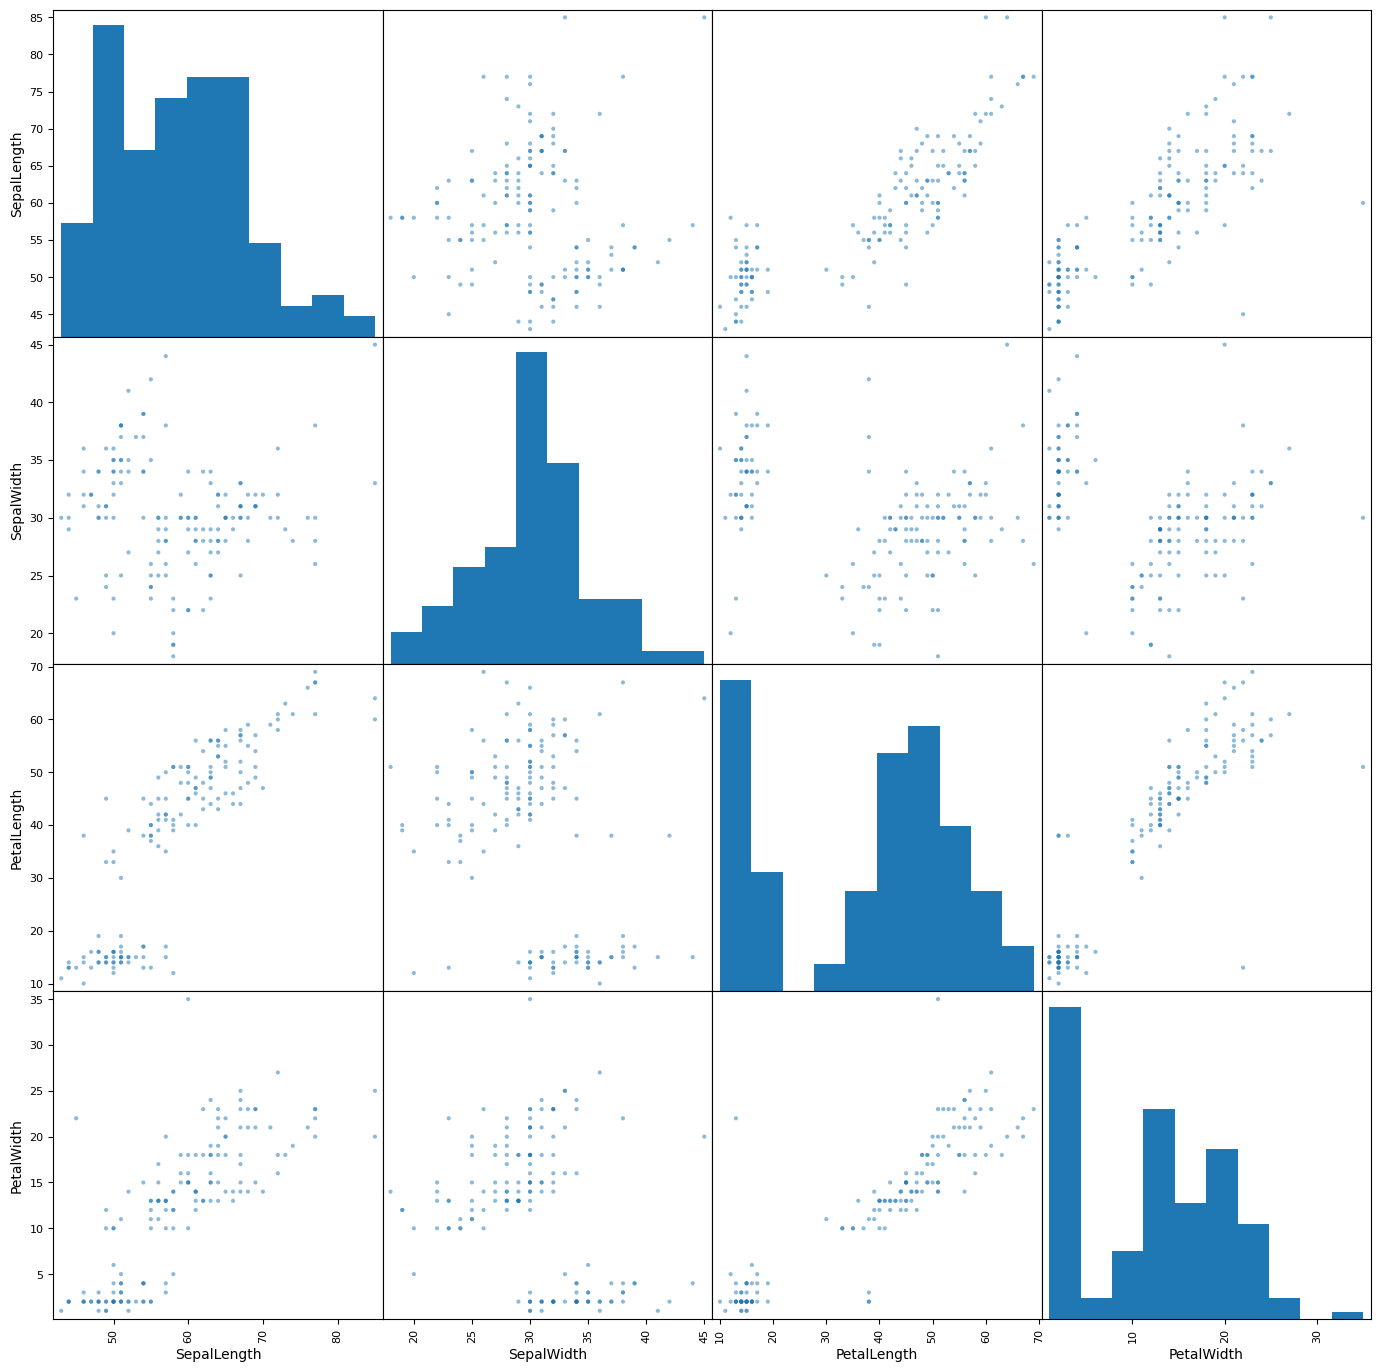

In [24]:
# # Displaying the scatter plot of  	SepalLength	SepalWidth	PetalLength	PetalWidth	Species, one pair at a time
# # Create scatter plot matrix

pd.plotting.scatter_matrix(df.loc[:, 'SepalLength':'PetalWidth'], figsize=(17,17), diagonal='hist')

# Show plot
plt.show()

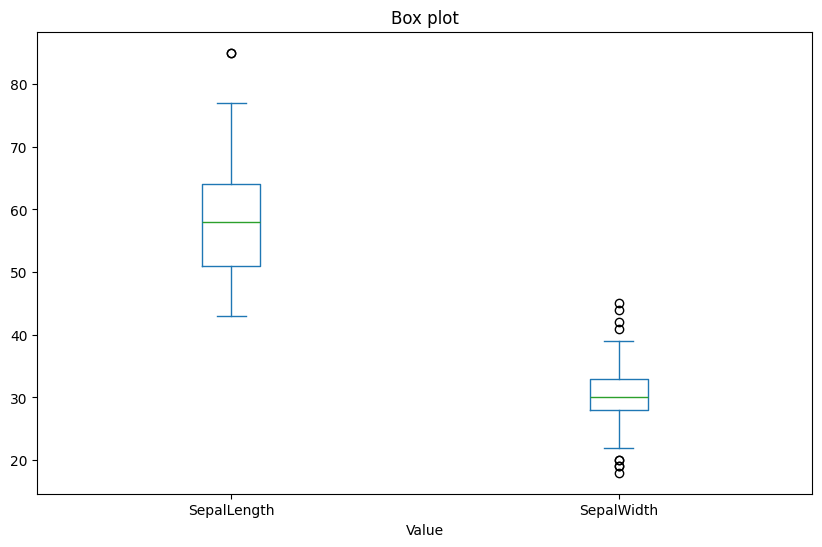

In [17]:
# Create a box plot
subset=df.loc[:, 'SepalLength':'SepalWidth']
subset.plot(kind="box", vert=True, figsize=(10, 6))
plt.title("Box plot", fontsize=12)
plt.xlabel("Value")
plt.show()

In [18]:
df2=df.drop('Species',axis=1)
df2.head()
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (df2 < lower_bound) | (df2 > upper_bound)
df2['Outlier']=outliers.any(axis=1)
df2.head()
filtered_df = df2[df2['Outlier'] == True]  
print(filtered_df)

     SepalLength  SepalWidth  PetalLength  PetalWidth  Outlier
18            58          20           12           5     True
24            57          44           15           4     True
27            52          41           15           1     True
28            55          42           38           2     True
63            58          19           40          12     True
78            50          20           35          10     True
80            58          19           39          12     True
117           85          45           64          20     True
128           58          18           51          14     True
149           85          33           60          25     True


In [19]:
# develop your regresion model
from statsmodels.formula.api import ols
res = ols(
    ' PetalWidth ~ SepalLength',
    data=df,
).fit()

In [20]:
 # develop prediction for the original predictors
predictions = res.get_prediction(df['SepalLength'])
predict_df = predictions.summary_frame(alpha=.05)
predict_df.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,5.983117,0.546856,4.902463,7.063771,-3.437942,15.404176
1,3.164484,0.685347,1.810154,4.518813,-6.291876,12.620844
2,3.164484,0.685347,1.810154,4.518813,-6.291876,12.620844
3,6.687775,0.516158,5.667784,7.707767,-2.726518,16.102069
4,9.506408,0.419538,8.677349,10.335467,0.110884,18.901933


In [21]:
outliers = (df['PetalWidth'] < predict_df['obs_ci_lower']) | (df['PetalWidth'] > predict_df['obs_ci_upper'])
df['outlier'] = outliers
df.tail(20)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,outlier
130,71,30,59,21,Virginica,False
131,64,31,55,18,Virginica,False
132,60,30,48,18,Virginica,False
133,63,29,56,18,Virginica,False
134,77,26,69,23,Virginica,False
135,60,22,50,15,Virginica,False
136,69,32,57,23,Virginica,False
137,74,28,61,19,Virginica,False
138,56,28,49,17,Virginica,False
139,73,29,63,18,Virginica,False


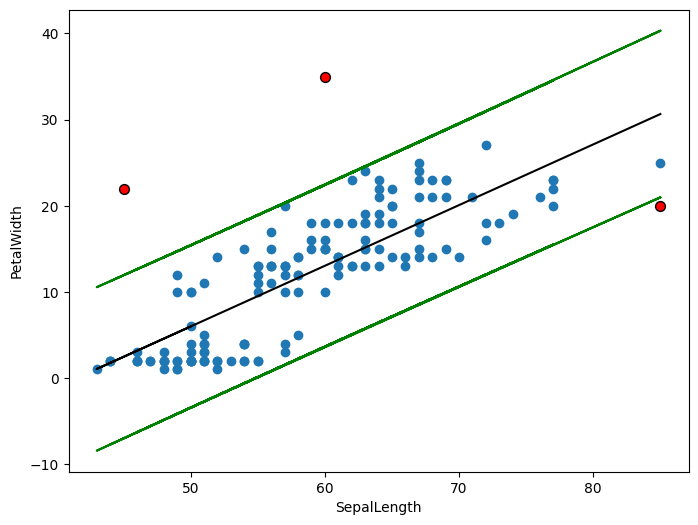

Outliers:
     SepalLength  SepalWidth  PetalLength  PetalWidth    Species  outlier
43            45          23           13          22     Setosa     True
117           85          45           64          20  Virginica     True
148           60          30           51          35  Virginica     True


In [22]:



# # Plot results
plt.figure(figsize=(8, 6))
plt.scatter(df['SepalLength'], df['PetalWidth'], label='df')
plt.plot(df['SepalLength'], predict_df['mean'] , color='black', label='Regression Line')
plt.plot(df['SepalLength'], predict_df['obs_ci_lower'] , color='green', label='Regression Line')
plt.plot(df['SepalLength'], predict_df['obs_ci_upper'] , color='green', label='Regression Line')
plt.scatter(df.loc[outliers, 'SepalLength' ], df.loc[outliers,'PetalWidth'  ], color='red', label='Outliers', edgecolors='k', s=50)
plt.xlabel('SepalLength')
plt.ylabel('PetalWidth')
# plt.legend()
# plt.title('Regression with 95% Confidence Interval and Outliers')
plt.show()

# Print identified outliers
print("Outliers:")
print(df.loc[outliers])